In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def get_fc_sc_btw_two_species_with_gene_list(species_1,species_2,list_of_genes_in_species_1_as_panda):
    import pandas as pd
    import numpy as np
    #Convert Taxa to common names if NCBI taxa ID
    #Set up variable 
    fc_mapper = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/Species_name_resolver.csv')

    if type(species_1) == int:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_1].item()
    if type(species_2) == int:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Taxa ID'] == species_2].item()

    #Convert scientific name to common names if given scientific
    if ' ' in species_1:
        species_1 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_1].item()
    if ' ' in species_2:
        species_2 = fc_mapper['Common Name'].loc[fc_mapper['Species'] == species_2].item()

    #Get Scientific Name
    scientific_1 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_1].item()
    scientific_2 = fc_mapper['Species'].loc[fc_mapper['Common Name'] == species_2].item()

    if species_1 == species_2:
        raise NameError("Species are the Same, submit different species")
    
    # Get Path for Orthologs
    path_to_orthologs_mapped_pd = pd.read_csv('/data/passala/Generated_Tables/Reference_tables/mapping_paths_for_fc_scores.csv',index_col = 0)
    path_to_orthologs = path_to_orthologs_mapped_pd.loc[scientific_1,scientific_2]

    ortholog_map = pd.read_csv(path_to_orthologs)
    file_name = path_to_orthologs.split('/')[-1]
    file_name = file_name.split('_')
    if file_name[0] == species_1:
        list_of_genes_in_species_1_as_panda = list_of_genes_in_species_1_as_panda.rename(columns = {list_of_genes_in_species_1_as_panda.columns[0]:'sp1_gene'})
        fc_sc_map = list_of_genes_in_species_1_as_panda.merge(ortholog_map,on = 'sp1_gene',how = 'left')
        fc_sc_map.dropna(inplace = True)
    if file_name[1] == species_1:
        list_of_genes_in_species_1_as_panda = list_of_genes_in_species_1_as_panda.rename(columns = {list_of_genes_in_species_1_as_panda.columns[0]:'sp2_gene'})
        fc_sc_map = list_of_genes_in_species_1_as_panda.merge(ortholog_map,on = 'sp2_gene',how = 'left')
        fc_sc_map.dropna(inplace = True)
    # return fc_sc_map,species_name
    return fc_sc_map

In [3]:
expressolog_table = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/expressologs.tsv', sep ='\t')

In [4]:
fc_scores = pd.read_csv('/data/suresh/species/CoCoCoNet2/scoresN-M/arabidopsis_maize_prio_NM.csv')
gene_info = pd.read_csv('/data/CoCoCoNet/geneInfo/maize_info.csv')

In [5]:
grm_name = gene_info['Synonyms'].str.split('|', expand = True)
grm_name = grm_name[[1]]
grm_name.columns = ['GRM Name']
grm_name

,GRM Name
0,GRMZM2G059865
1,NaN
2,GRMZM2G374779
3,GRMZM2G374812
4,GRMZM2G002121
...,...
46267,NaN
46268,NaN
46269,NaN
46270,NaN


In [6]:
gene_info['GRM Name'] = grm_name['GRM Name']
gene_info = gene_info[['EnsemblID','GRM Name']]
gene_info = gene_info.dropna()

In [7]:
gene_info

,EnsemblID,GRM Name
0,Zm00001d027231,GRMZM2G059865
2,Zm00001d027267,GRMZM2G374779
3,Zm00001d027268,GRMZM2G374812
4,Zm00001d027276,GRMZM2G002121
5,Zm00001d027277,GRMZM2G026639
...,...,...
19460,Zm00001d000438,GRMZM2G175812
19461,Zm00001d000439,GRMZM5G886913
19462,Zm00001d000443,GRMZM2G354053
19463,Zm00001d000447,GRMZM2G120940


In [8]:
# gene_info.to_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/ensmbl_to_grm_table.csv', index = False)

In [9]:
gene_info

,EnsemblID,GRM Name
0,Zm00001d027231,GRMZM2G059865
2,Zm00001d027267,GRMZM2G374779
3,Zm00001d027268,GRMZM2G374812
4,Zm00001d027276,GRMZM2G002121
5,Zm00001d027277,GRMZM2G026639
...,...,...
19460,Zm00001d000438,GRMZM2G175812
19461,Zm00001d000439,GRMZM5G886913
19462,Zm00001d000443,GRMZM2G354053
19463,Zm00001d000447,GRMZM2G120940


In [8]:
fc_scores.columns = ['sp1_gene','EnsemblID','fc','sc']
fc_scores

,sp1_gene,EnsemblID,fc,sc
0,AT3G03480,Zm00001d014748,0.543805,0.895452
1,AT5G17540,Zm00001d014748,0.459759,0.397786
2,AT5G42620,Zm00001d033895,0.777918,0.836989
3,AT1G08190,Zm00001d001859,0.869098,0.988282
4,AT1G62640,Zm00001d002103,0.839682,0.971713
...,...,...,...,...
28607,AT4G28450,Zm00001d034883,0.929695,0.984241
28608,AT1G70460,Zm00001d011450,0.153238,0.013185
28609,AT1G23540,Zm00001d011450,0.370911,0.353658
28610,AT1G32530,Zm00001d020292,0.846640,0.954276


In [9]:
maize_genes_of_interest = expressolog_table[['Maize ID']]
maize_genes_of_interest = maize_genes_of_interest['Maize ID'].str.split('_',expand = True)

In [10]:
maize_genes_of_interest = maize_genes_of_interest[[0]]
maize_genes_of_interest.columns = ['Maize ID']
expressolog_table['GRM Name'] = maize_genes_of_interest['Maize ID']

In [11]:
expressolog_table = expressolog_table.merge(right = gene_info, how = 'left', on = 'GRM Name')
expressolog_table

,Ath ID,Ath Probeset,Genome,Maize ID,Maize Probeset,Genome.1,SCC Value,Seq Similarity,GRM Name,EnsemblID
0,AT1G11280,262458_at,ATHL,GRMZM2G000620_T01,GRMZM2G000620_T01,MAIZE,-0.0521,40,GRMZM2G000620,NaN
1,AT1G11280,262458_at,ATHL,GRMZM2G075247_T01,GRMZM2G075247_T01,MAIZE,0.1558,39,GRMZM2G075247,Zm00001d032408
2,AT1G11280,262458_at,ATHL,GRMZM2G152120_T01,GRMZM2G152120_T01,MAIZE,-0.0071,36,GRMZM2G152120,NaN
3,AT1G11280,262458_at,ATHL,GRMZM2G160853_T01,GRMZM2G160853_T01,MAIZE,-0.4127,29,GRMZM2G160853,NaN
4,AT1G11280,262458_at,ATHL,GRMZM2G175288_T01,GRMZM2G175288_T01,MAIZE,-0.0652,28,GRMZM2G175288,NaN
...,...,...,...,...,...,...,...,...,...,...
30398,AT3G13445,256961_at,ATHL,GRMZM2G149238_T04,GRMZM2G149238_T04,MAIZE,-0.0695,84,GRMZM2G149238,Zm00001d033472
30399,AT2G23930,266579_at,ATHL,GRMZM2G083642_T01,GRMZM2G083642_T01,MAIZE,0.4003,88,GRMZM2G083642,Zm00001d029483
30400,AT4G18960,254595_at,ATHL,GRMZM2G471089_T01,GRMZM2G471089_T01,MAIZE,0.5604,42,GRMZM2G471089,Zm00001d039434
30401,AT5G49940,248532_at,ATHL,GRMZM2G089317_T03,GRMZM2G089317_T03,MAIZE,0.6936,47,GRMZM2G089317,NaN


In [12]:
expressolog_table = expressolog_table.dropna(subset = ['EnsemblID'])


In [13]:
fc_scores

,sp1_gene,EnsemblID,fc,sc
0,AT3G03480,Zm00001d014748,0.543805,0.895452
1,AT5G17540,Zm00001d014748,0.459759,0.397786
2,AT5G42620,Zm00001d033895,0.777918,0.836989
3,AT1G08190,Zm00001d001859,0.869098,0.988282
4,AT1G62640,Zm00001d002103,0.839682,0.971713
...,...,...,...,...
28607,AT4G28450,Zm00001d034883,0.929695,0.984241
28608,AT1G70460,Zm00001d011450,0.153238,0.013185
28609,AT1G23540,Zm00001d011450,0.370911,0.353658
28610,AT1G32530,Zm00001d020292,0.846640,0.954276


In [14]:
expressolog_table = expressolog_table.merge(right = fc_scores, how = 'left', on= 'EnsemblID')
expressolog_table = expressolog_table.dropna(subset = ['fc'])

In [15]:
expressolog_table = expressolog_table.sort_values(by ='fc', ascending = False)

In [16]:
expressolog_table = expressolog_table.drop_duplicates(subset = 'EnsemblID', keep = 'last')
expressolog_table['Concordance Between Expressolog and Paralog'] = 'Disconcordant'
expressolog_table

,Ath ID,Ath Probeset,Genome,Maize ID,Maize Probeset,Genome.1,SCC Value,Seq Similarity,GRM Name,EnsemblID,sp1_gene,fc,sc,Concordance Between Expressolog and Paralog
40518,AT1G52230,259840_at,ATHL,GRMZM2G451224_T01,GRMZM2G451224_T01,MAIZE,0.6951,68,GRMZM2G451224,Zm00001d038984,AT3G16140,0.997915,0.999518,Disconcordant
43614,AT1G30380,256309_at,ATHL,GRMZM2G012397_T01,GRMZM2G012397_T01,MAIZE,0.7432,70,GRMZM2G012397,Zm00001d018797,AT1G30380,0.997900,0.999482,Disconcordant
37792,AT1G06680,262632_at,ATHL,GRMZM2G047954_T01,GRMZM2G047954_T01,MAIZE,0.7892,63,GRMZM2G047954,Zm00001d018779,AT1G06680,0.997820,0.999294,Disconcordant
41887,AT4G02770,255457_at,ATHL,GRMZM2G013342_T01,GRMZM2G013342_T01,MAIZE,0.6848,67,GRMZM2G013342,Zm00001d034543,NaN,0.997630,0.999149,Disconcordant
41303,AT1G61520,265033_at,ATHL,GRMZM2G010884_T01,GRMZM2G010884_T01,MAIZE,0.7417,77,GRMZM2G010884,Zm00001d046786,AT1G61520,0.997591,0.999665,Disconcordant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34027,AT2G36460,263921_at,ATHL,GRMZM2G057823_T01,GRMZM2G057823_T01,MAIZE,-0.0488,82,GRMZM2G057823,Zm00001d042453,AT4G26530,0.236709,0.004966,Disconcordant
35206,AT3G16520,257205_at,ATHL,GRMZM2G051683_T01,GRMZM2G051683_T01,MAIZE,0.0809,45,GRMZM2G051683,Zm00001d043752,AT3G16520,0.225604,0.256120,Disconcordant
30599,AT5G42830,249188_at,ATHL,GRMZM2G124815_T01,GRMZM2G124815_T01,MAIZE,0.4160,41,GRMZM2G124815,Zm00001d035865,AT5G07860,0.222725,0.108576,Disconcordant
44646,AT4G37310,253052_at,ATHL,GRMZM2G132450_T01,GRMZM2G132450_T01,MAIZE,-0.1714,39,GRMZM2G132450,Zm00001d030851,AT5G67310,0.212723,0.000968,Disconcordant


In [17]:
expressolog_table['Concordance Between Expressolog and Paralog'].loc[expressolog_table['Ath ID'] == expressolog_table['sp1_gene']] = 'Concordant'

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/indexing.py:1636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
expressolog_table.loc[expressolog_table['Concordance Between Expressolog and Paralog'] == 'Concordant']

,Ath ID,Ath Probeset,Genome,Maize ID,Maize Probeset,Genome.1,SCC Value,Seq Similarity,GRM Name,EnsemblID,sp1_gene,fc,sc,Concordance Between Expressolog and Paralog
43614,AT1G30380,256309_at,ATHL,GRMZM2G012397_T01,GRMZM2G012397_T01,MAIZE,0.7432,70,GRMZM2G012397,Zm00001d018797,AT1G30380,0.997900,0.999482,Concordant
37792,AT1G06680,262632_at,ATHL,GRMZM2G047954_T01,GRMZM2G047954_T01,MAIZE,0.7892,63,GRMZM2G047954,Zm00001d018779,AT1G06680,0.997820,0.999294,Concordant
41303,AT1G61520,265033_at,ATHL,GRMZM2G010884_T01,GRMZM2G010884_T01,MAIZE,0.7417,77,GRMZM2G010884,Zm00001d046786,AT1G61520,0.997591,0.999665,Concordant
37070,AT4G21280,254398_at,ATHL,GRMZM2G021617_T01,GRMZM2G021617_T01,MAIZE,0.7260,57,GRMZM2G021617,Zm00001d021703,AT4G21280,0.996700,0.998686,Concordant
36003,AT3G03710,259344_at,ATHL,GRMZM2G377761_T01,GRMZM2G377761_T01,MAIZE,0.6767,64,GRMZM2G377761,Zm00001d018891,AT3G03710,0.995636,0.999963,Concordant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25524,AT2G33530,255842_at,ATHL,GRMZM2G052507_T01,GRMZM2G052507_T01,MAIZE,-0.0271,65,GRMZM2G052507,Zm00001d007372,AT2G33530,0.300913,0.308082,Concordant
43855,AT4G33120,253362_s_at,ATHL,GRMZM2G005886_T01,GRMZM2G005886_T01,MAIZE,0.3930,66,GRMZM2G005886,Zm00001d046363,AT4G33120,0.273506,0.396831,Concordant
38227,AT5G50950,248461_s_at,ATHL,GRMZM2G010823_T01,GRMZM2G010823_T01,MAIZE,-0.0875,76,GRMZM2G010823,Zm00001d029084,AT5G50950,0.270719,0.029715,Concordant
35206,AT3G16520,257205_at,ATHL,GRMZM2G051683_T01,GRMZM2G051683_T01,MAIZE,0.0809,45,GRMZM2G051683,Zm00001d043752,AT3G16520,0.225604,0.256120,Concordant


(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

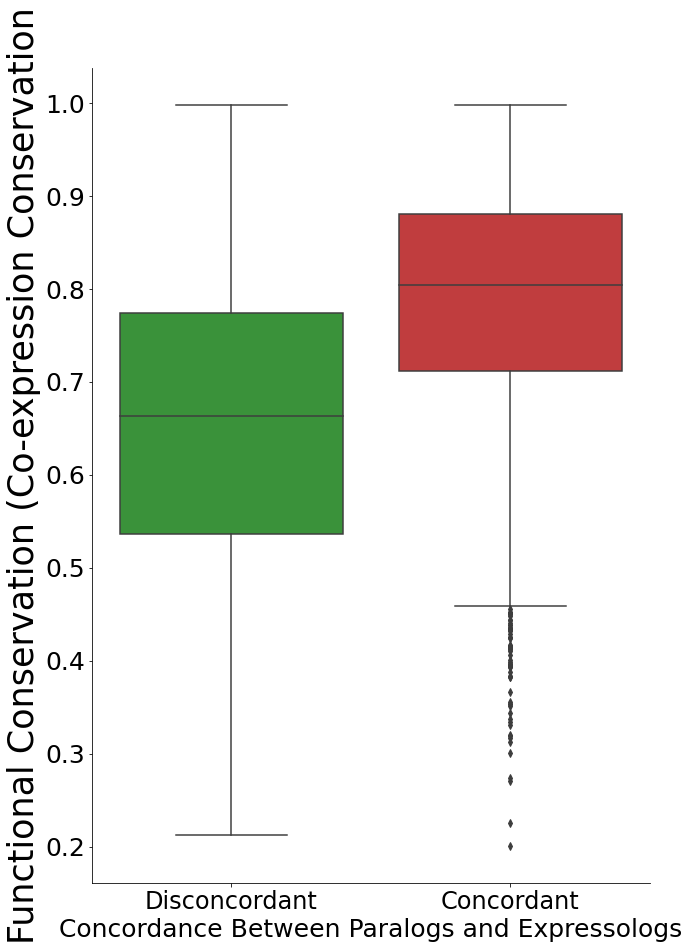

In [18]:
fig, ax = plt.subplots(figsize = (10,15))
sns.boxplot(data = expressolog_table, x = 'Concordance Between Expressolog and Paralog', y = 'fc', palette = ['tab:green','tab:red'])
plt.ylabel("Functional Conservation (Co-expression Conservation", fontsize = 35)
plt.xlabel('Concordance Between Paralogs and Expressologs',fontsize = 25)
sns.despine()

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
#plt.title("As Intra-Set Co-expresssion Increases, the Range of Functional Conservation Values Increases", fontsize = 25)
plt.xticks(fontsize = 24)
plt.yticks(fontsize = 25)